In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from keras import layers


2024-04-27 23:43:02.081193: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 23:43:02.350463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 23:43:02.350519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 23:43:02.402059: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-27 23:43:02.517995: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 23:43:02.519340: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/val'

img_width = 180
img_height =180 

In [3]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

data_cat = data_train.class_names

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [4]:
model = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))])

lr = 0.01

In [5]:
opt = keras.optimizers.SGD(learning_rate=lr)

model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
163/163 [==============================] - 59s 355ms/step - loss: 0.4668 - accuracy: 0.7891 - val_loss: 0.6110 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 57s 345ms/step - loss: 0.2455 - accuracy: 0.9041 - val_loss: 0.7062 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 57s 348ms/step - loss: 0.1669 - accuracy: 0.9365 - val_loss: 0.4050 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 58s 353ms/step - loss: 0.1405 - accuracy: 0.9471 - val_loss: 0.2899 - val_accuracy: 0.8750
Epoch 5/20
163/163 [==============================] - 58s 353ms/step - loss: 0.1249 - accuracy: 0.9540 - val_loss: 0.4370 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 58s 355ms/step - loss: 0.1136 - accuracy: 0.9553 - val_loss: 0.3055 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 58s 356ms/step - loss: 0.1018 - accuracy: 0.9617 - val_loss: 0.2610 - val_ac

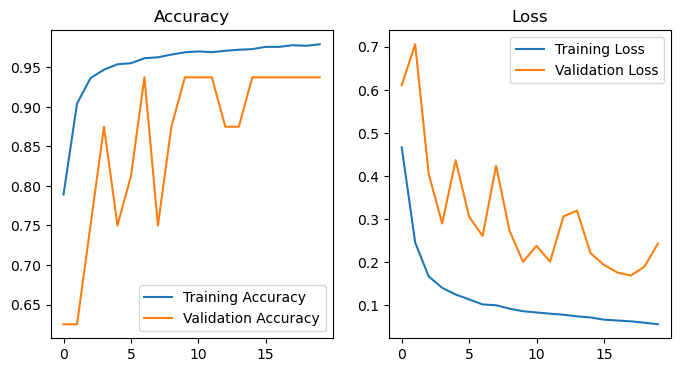

In [6]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,2)
plt.plot(range(epochs_size), history.history['loss'],label = 'Training Loss')
plt.plot(range(epochs_size), history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,1)
plt.plot(range(epochs_size), history.history['accuracy'],label = 'Training Accuracy')
plt.plot(range(epochs_size), history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()


In [8]:
model2 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))])

lr2 = 0.001

In [9]:
opt2 = keras.optimizers.SGD(learning_rate=lr2)

model2.compile(optimizer=opt2, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 20
history2 = model2.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20


163/163 [==============================] - 57s 342ms/step - loss: 0.5904 - accuracy: 0.7400 - val_loss: 0.8235 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 57s 347ms/step - loss: 0.5624 - accuracy: 0.7429 - val_loss: 0.7993 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 58s 355ms/step - loss: 0.5380 - accuracy: 0.7429 - val_loss: 0.7908 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 58s 350ms/step - loss: 0.5022 - accuracy: 0.7431 - val_loss: 0.7558 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 58s 355ms/step - loss: 0.4416 - accuracy: 0.7711 - val_loss: 0.6975 - val_accuracy: 0.5625
Epoch 6/20
163/163 [==============================] - 59s 361ms/step - loss: 0.3571 - accuracy: 0.8543 - val_loss: 0.5772 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 60s 362ms/step - loss: 0.2830 - accuracy: 0.8940 - val_loss: 0.5007 - val_accuracy: 0.8

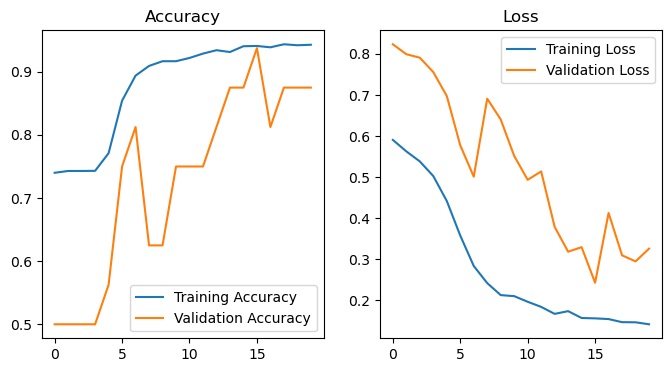

In [10]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,2)
plt.plot(range(epochs_size), history2.history['loss'],label = 'Training Loss')
plt.plot(range(epochs_size), history2.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,1)
plt.plot(range(epochs_size), history2.history['accuracy'],label = 'Training Accuracy')
plt.plot(range(epochs_size), history2.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()

In [11]:
model3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))])

lr3 = 0.0001

In [13]:
opt3 = keras.optimizers.SGD(learning_rate=lr3)

model3.compile(optimizer=opt3, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 20
history3 = model3.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20


163/163 [==============================] - 66s 399ms/step - loss: 0.5468 - accuracy: 0.7429 - val_loss: 0.8022 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 66s 403ms/step - loss: 0.5443 - accuracy: 0.7429 - val_loss: 0.7972 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 63s 383ms/step - loss: 0.5392 - accuracy: 0.7429 - val_loss: 0.7973 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 62s 377ms/step - loss: 0.5343 - accuracy: 0.7429 - val_loss: 0.7902 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 58s 351ms/step - loss: 0.5291 - accuracy: 0.7429 - val_loss: 0.7905 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 56s 343ms/step - loss: 0.5253 - accuracy: 0.7429 - val_loss: 0.7852 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 57s 344ms/step - loss: 0.5188 - accuracy: 0.7429 - val_loss: 0.7816 - val_accuracy: 0.5

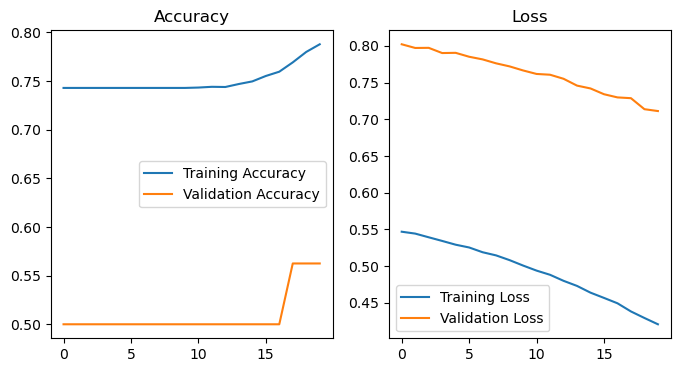

In [14]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,2)
plt.plot(range(epochs_size), history3.history['loss'],label = 'Training Loss')
plt.plot(range(epochs_size), history3.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,1)
plt.plot(range(epochs_size), history3.history['accuracy'],label = 'Training Accuracy')
plt.plot(range(epochs_size), history3.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()